In [1]:
run_gridsearch = True
skip_best_model_train = False
hyperparam_csv_file = "guerneville_mts2_hyperparams.csv"

In [2]:
import sys
import os
import itertools
current_dir = os.getcwd()
print(current_dir)

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all', '/Users/canruso/Desktop', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python310.zip', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/lib-dynload', '', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages/setuptools/_vendor']


In [4]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import (combinedPlot, fancyCombinedPlot, combinedPlotFromDf, fancyCombinedPlotFromDf, fractional_multi_lr)

In [5]:
# Dynamically find the repo root from the current working directory
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

# Construct the target path
target_path = os.path.join(library_path, 'UCB_training', 'models', 'guerneville_all')

# Verify if the directory exists before changing
if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("guerneville")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all
Train Basin File Exists: True


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("guerneville_mtslstm2.yaml")
path_to_physics_data_1D = Path(library_path + "/russian_river_data/Guerneville_daily_shift.csv")
path_to_physics_data_1H = Path(library_path + "/russian_river_data/Guerneville_hourly.csv")

In [7]:
features_with_physics = [
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    "Guerneville Gage FLOW",
    "Big Sulphur Cr ET-POTENTIAL",
    "Big Sulphur Cr FLOW",
    "Big Sulphur Cr FLOW-BASE",
    "Big Sulphur Cr INFILTRATION",
    "Big Sulphur Cr PERC-SOIL",
    "Big Sulphur Cr SATURATION FRACTION",
    "Dry Creek 10 ET-POTENTIAL",
    "Dry Creek 10 FLOW",
    "Dry Creek 10 FLOW-BASE",
    "Dry Creek 10 INFILTRATION",
    "Dry Creek 10 PERC-SOIL",
    "Dry Creek 10 SATURATION FRACTION",
    "Green Valley ET-POTENTIAL",
    "Green Valley FLOW",
    "Green Valley FLOW-BASE",
    "Green Valley INFILTRATION",
    "Green Valley PERC-SOIL",
    "Green Valley SATURATION FRACTION",
    "Laguna ET-POTENTIAL",
    "Laguna FLOW",
    "Laguna FLOW-BASE",
    "Laguna INFILTRATION",
    "Laguna PERC-SOIL",
    "Laguna SATURATION FRACTION",
    "Russian 20 ET-POTENTIAL",
    "Russian 20 FLOW",
    "Russian 20 FLOW-BASE",
    "Russian 20 INFILTRATION",
    "Russian 20 PERC-SOIL",
    "Russian 20 SATURATION FRACTION",
    "Russian 30 ET-POTENTIAL",
    "Russian 30 FLOW",
    "Russian 30 FLOW-BASE",
    "Russian 30 INFILTRATION",
    "Russian 30 PERC-SOIL",
    "Russian 30 SATURATION FRACTION",
    "Russian 40 ET-POTENTIAL",
    "Russian 40 FLOW",
    "Russian 40 FLOW-BASE",
    "Russian 40 INFILTRATION",
    "Russian 40 PERC-SOIL",
    "Russian 40 SATURATION FRACTION",
    "Russian 50 ET-POTENTIAL",
    "Russian 50 FLOW",
    "Russian 50 FLOW-BASE",
    "Russian 50 INFILTRATION",
    "Russian 50 PERC-SOIL",
    "Russian 50 SATURATION FRACTION",
    "Russian 60 ET-POTENTIAL",
    "Russian 60 FLOW",
    "Russian 60 FLOW-BASE",
    "Russian 60 INFILTRATION",
    "Russian 60 PERC-SOIL",
    "Russian 60 SATURATION FRACTION",
    "Russian 70 ET-POTENTIAL",
    "Russian 70 FLOW",
    "Russian 70 FLOW-BASE",
    "Russian 70 INFILTRATION",
    "Russian 70 PERC-SOIL",
    "Russian 70 SATURATION FRACTION",
    "Santa Rosa Cr 10 ET-POTENTIAL",
    "Santa Rosa Cr 10 FLOW",
    "Santa Rosa Cr 10 FLOW-BASE",
    "Santa Rosa Cr 10 INFILTRATION",
    "Santa Rosa Cr 10 PERC-SOIL",
    "Santa Rosa Cr 10 SATURATION FRACTION",
    "Santa Rosa Cr 20 ET-POTENTIAL",
    "Santa Rosa Cr 20 FLOW",
    "Santa Rosa Cr 20 FLOW-BASE",
    "Santa Rosa Cr 20 INFILTRATION",
    "Santa Rosa Cr 20 PERC-SOIL",
    "Santa Rosa Cr 20 SATURATION FRACTION",
    "WF Russian ET-POTENTIAL",
    "WF Russian FLOW",
    "WF Russian FLOW-BASE",
    "WF Russian INFILTRATION",
    "WF Russian PERC-SOIL",
    "WF Russian SATURATION FRACTION"
]

In [8]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length_1D": [90, 120],
    "seq_length_1H": [168, 336],
    "num_layers": [1],
    "epochs": [16, 32, 48],
    "batch_size": [64, 128],
    "schedule_pairs": [
        ((0.5, 0.3), (0.01, 0.005, 0.001)),
        ((0.4, 0.4), (0.02, 0.005, 0.001))
    ]
}

fixed_dropout = 0.4
no_physics_results = []
physics_results = []

In [ ]:
# starting time in UTC time
from datetime import datetime
start_time = datetime.utcnow()
print("Start time:", start_time.strftime("%Y-%m-%d %H:%M:%S"))

In [9]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seqD, seqH, nl, ep, bs, schedule_pair) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length_1D"],
            hyperparam_space["seq_length_1H"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"],
            hyperparam_space["batch_size"],
            hyperparam_space["schedule_pairs"]):

        (f1, f2), (lr1, lr2, lr3) = schedule_pair

        fractions = [f1, f2]
        lr_list = [lr1, lr2, lr3]

        lr_dict = fractional_multi_lr(
            epochs=ep,
            fractions=fractions,
            lrs=lr_list,
            round_up=True)


        hp = {
            "hidden_size": hs,
            "seq_length": {"1D": seqD, "1H": seqH},
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
            "batch_size": bs,
            "learning_rate": lr_dict
        }

        print(f"\nNoPhysics MTS: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=True,  
            extend_train_period=False,
            gpu=-1,
            is_mts = True
        )
        trainer.train()
        csv_1d, metrics_1d = trainer.results(period="validation", mts_trk="1D")
        csv_1h, metrics_1h = trainer.results(period="validation", mts_trk="1H")

        row_data = {
            "hidden_size": hs,
            "seq_length_1D": seqD,
            "seq_length_1H": seqH,
            "num_layers": nl,
            "epochs": ep,
            "batch_size": bs,
            "learning_rate": str(lr_dict),
            "output_dropout": fixed_dropout,
            "NSE_1D": metrics_1d.get("NSE", 0),
            "NSE_1H": metrics_1h.get("NSE", 0)
        }
        
        no_physics_results.append(row_data)

    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="NSE_1D", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping grid search!")

Skipping grid search!


In [10]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seqD, seqH, nl, ep, bs, schedule_pair) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length_1D"],
            hyperparam_space["seq_length_1H"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"],
            hyperparam_space["batch_size"],
            hyperparam_space["schedule_pairs"]):

        (f1, f2), (lr1, lr2, lr3) = schedule_pair

        fractions = [f1, f2]
        lr_list = [lr1, lr2, lr3]

        lr_dict = fractional_multi_lr(
            epochs=ep,
            fractions=fractions,
            lrs=lr_list,
            round_up=True)


        hp = {
            "hidden_size": hs,
            "seq_length": {"1D": seqD, "1H": seqH},
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
            "batch_size": bs,
            "learning_rate": lr_dict
        }

        print(f"\nPhysics MTS: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data_1H,
            hourly=True,
            extend_train_period=False,
            gpu=-1,
            is_mts = True
        )
        trainer.train()
        csv_1d, metrics_1d = trainer.results(period="validation", mts_trk="1D")
        csv_1h, metrics_1h = trainer.results(period="validation", mts_trk="1H")

        row_data = {
            "hidden_size": hs,
            "seq_length_1D": seqD,
            "seq_length_1H": seqH,
            "num_layers": nl,
            "epochs": ep,
            "batch_size": bs,
            "learning_rate": str(lr_dict),
            "output_dropout": fixed_dropout,
            "NSE_1D": metrics_1d.get("NSE", 0),
            "NSE_1H": metrics_1h.get("NSE", 0)
        }
        
        physics_results.append(row_data)
        
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="NSE_1D", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping grid search!")

Skipping grid search!


In [11]:
if run_gridsearch:
    print(df_no_physics.iloc[0:4])
    df_no_physics.to_csv("guerneville_mts2_no_physics_gridsearch.csv", index=False)

In [12]:
if run_gridsearch:
    print(df_physics.iloc[0:4])
    df_physics.to_csv("guerneville_mts2_physics_gridsearch.csv", index=False)

In [13]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()

    best_no_physics_params = {
        "epochs": int(best_no_phys["epochs"]),
        "hidden_size": int(best_no_phys["hidden_size"]),
        "seq_length": {
            "1D": int(best_no_phys["seq_length_1D"]),
            "1H": int(best_no_phys["seq_length_1H"])
        },
        "num_layers": int(best_no_phys["num_layers"]),
        "output_dropout": float(best_no_phys["output_dropout"]),
        "batch_size": int(best_no_phys["batch_size"]),
        "learning_rate": eval(best_no_phys["learning_rate"])
    }

    best_physics_params = {
        "epochs": int(best_phys["epochs"]),
        "hidden_size": int(best_phys["hidden_size"]),
        "seq_length": {
            "1D": int(best_phys["seq_length_1D"]),
            "1H": int(best_phys["seq_length_1H"])
        },
        "num_layers": int(best_phys["num_layers"]),
        "output_dropout": float(best_phys["output_dropout"]),
        "batch_size": int(best_phys["batch_size"]),
        "learning_rate": eval(best_phys["learning_rate"])
    }
    print("Loaded best hyperparams from CSV:")
    print("Best NO-PHYS:", best_no_physics_params)
    print("Best PHYS:", best_physics_params)
else:
    print(f"Error: {hyperparam_csv_file} not found. Did you run gridsearch?")

Loaded best hyperparams from CSV:
Best NO-PHYS: {'epochs': 32, 'hidden_size': 128, 'seq_length': {'1D': 90, '1H': 336}, 'num_layers': 1, 'output_dropout': 0.4}
Best PHYS: {'epochs': 32, 'hidden_size': 128, 'seq_length': {'1D': 90, '1H': 168}, 'num_layers': 1, 'output_dropout': 0.4}


In [14]:
if not skip_best_model_train:
    noPhysValTrainer = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=True,
        extend_train_period=False,
        gpu=-1,
        is_mts = True
    )
    noPhysValTrainer.train()
    noPhys_val_csv_1D, noPhys_val_metrics_1D = noPhysValTrainer.results(period="validation", mts_trk="1D")
    noPhys_val_csv_1H, noPhys_val_metrics_1H = noPhysValTrainer.results(period="validation", mts_trk="1H")
    print("NO-PHYS VAL 1D => NSE =", noPhys_val_metrics_1D.get("NSE", None))
    print("NO-PHYS VAL 1H => NSE =", noPhys_val_metrics_1H.get("NSE", None))

In [15]:
if not skip_best_model_train:
    physValTrainer = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data_1H,
        hourly=True,
        extend_train_period=False,
        gpu=-1,
        is_mts = True
    )
    physValTrainer.train()
    phys_val_csv_1D, phys_val_metrics_1D = physValTrainer.results(period="validation", mts_trk="1D")
    phys_val_csv_1H, phys_val_metrics_1H = physValTrainer.results(period="validation", mts_trk="1H")
    print("PHYS VAL 1D => NSE =", phys_val_metrics_1D.get("NSE", None))
    print("PHYS VAL 1H => NSE =", phys_val_metrics_1H.get("NSE", None))

[INFO] Wrote metrics CSV: guerneville_mts2_val_metrics_1D.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.

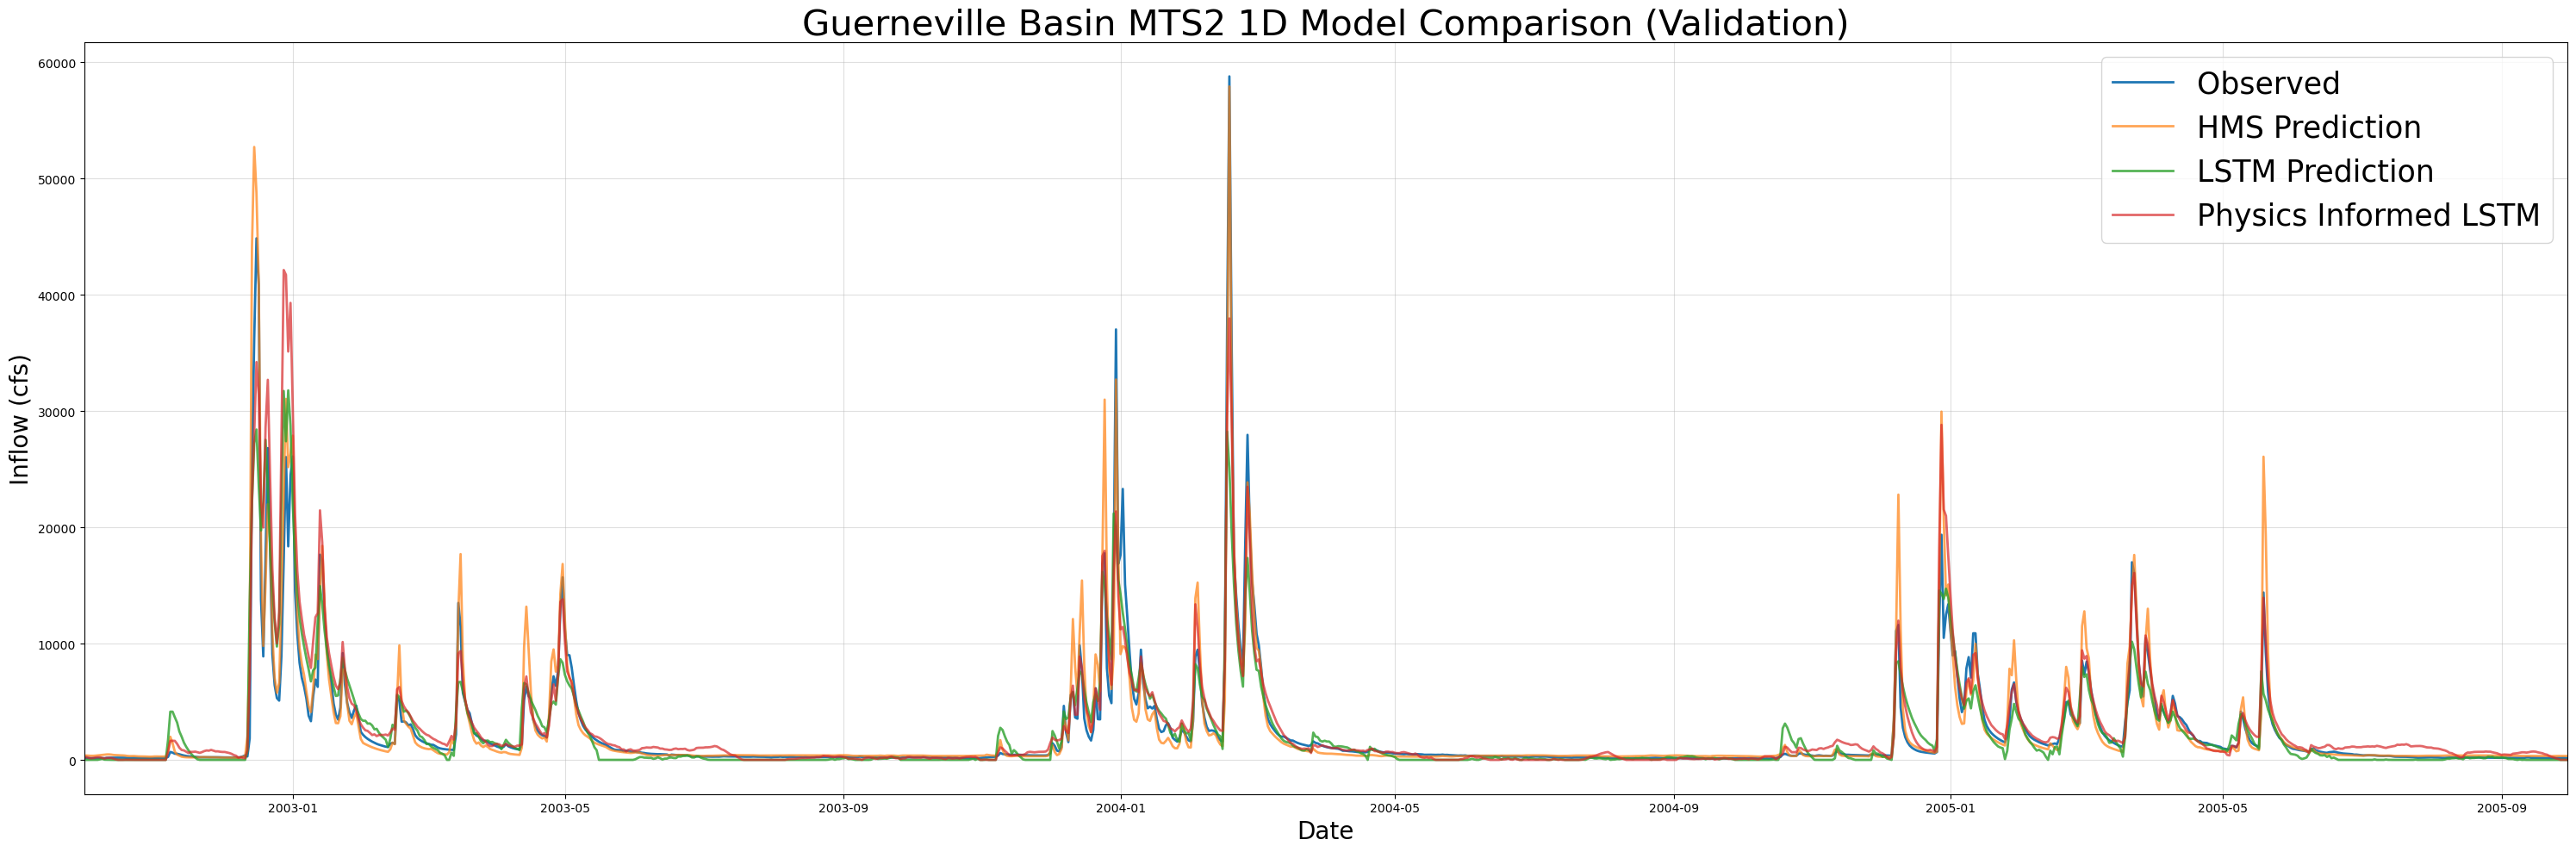

In [16]:
if not skip_best_model_train:
    print("\nPlotting combined MTS results (Validation, 1D)...")
    combinedPlot(
        lstm_results=noPhys_val_csv_1D,
        lstmPhysics_results=phys_val_csv_1D,
        HMS_results=path_to_physics_data_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1D.csv",
        plot_filename="guerneville_mts2_val_1D_comparison.png",
        timeseries_filename="guerneville_mts2_val_1D_combined_ts.csv"
    )
else:
    combined_df_1D = pd.read_csv("guerneville_mts2_val_1D_combined_ts.csv")
    combinedPlotFromDf(
        combined_df_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1D.csv"
    )

In [17]:
if not skip_best_model_train:
    fancyCombinedPlot(
        lstm_results=noPhys_val_csv_1D,
        lstmPhysics_results=phys_val_csv_1D,
        HMS_results=path_to_physics_data_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1D.csv",
        timeseries_filename="guerneville_mts2_val_1D_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(
        combined_df_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1D.csv"
    )

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.

[INFO] Wrote metrics CSV: guerneville_mts2_val_metrics_1D.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso

[INFO] Wrote metrics CSV: guerneville_mts2_val_metrics_1H.csv


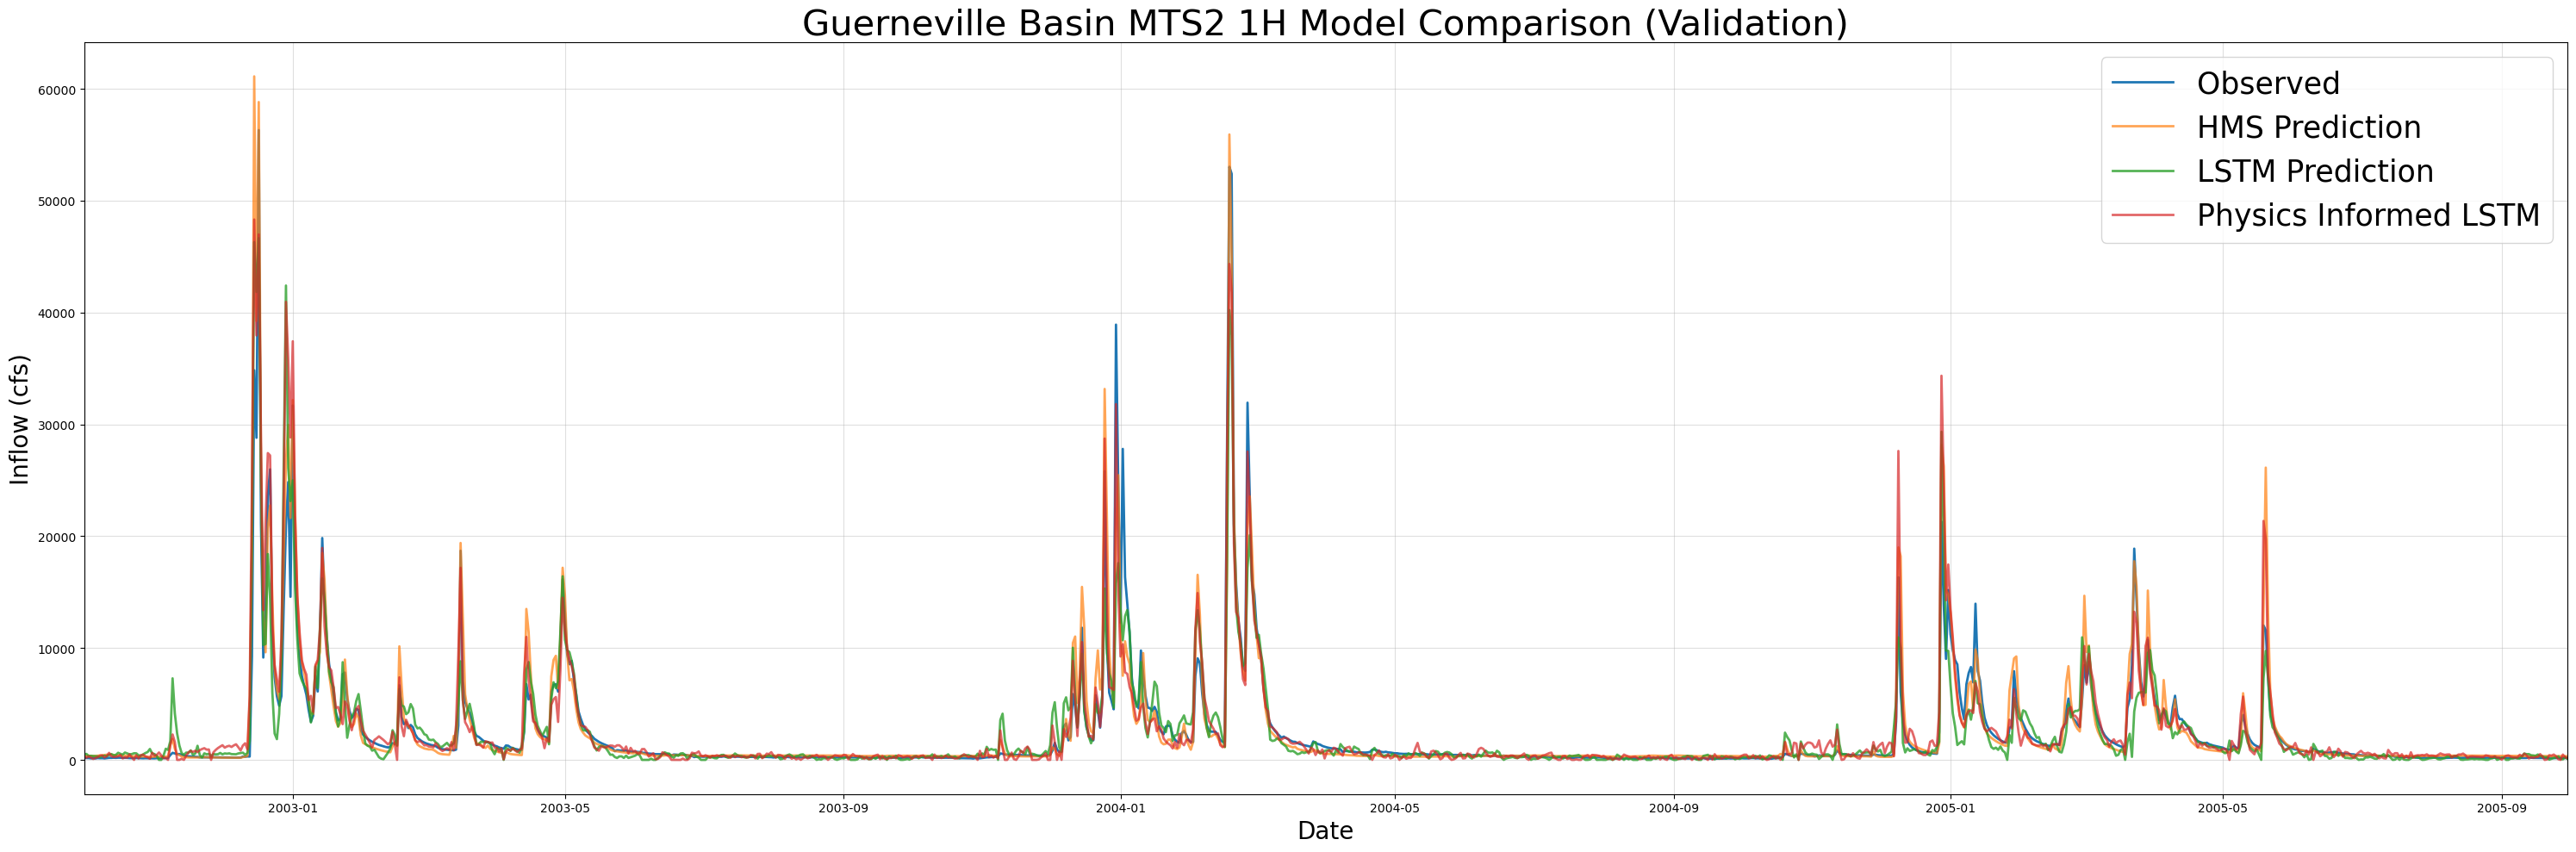

In [18]:
if not skip_best_model_train:
    print("\nPlotting combined MTS results (Validation, 1H)...")
    combinedPlot(
        lstm_results=noPhys_val_csv_1H,
        lstmPhysics_results=phys_val_csv_1H,
        HMS_results=path_to_physics_data_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1H.csv",
        plot_filename="guerneville_mts2_val_1H_comparison.png",
        timeseries_filename="guerneville_mts2_val_1H_combined_ts.csv"
    )
else:
    combined_df_1H = pd.read_csv("guerneville_mts2_val_1H_combined_ts.csv")
    combinedPlotFromDf(
        combined_df_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1H.csv"
    )

In [19]:
if not skip_best_model_train:
    fancyCombinedPlot(
        lstm_results=noPhys_val_csv_1H,
        lstmPhysics_results=phys_val_csv_1H,
        HMS_results=path_to_physics_data_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1H.csv",
        timeseries_filename="guerneville_mts2_val_1H_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(
        combined_df_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Validation)",
        fName="guerneville_mts2_val_metrics_1H.csv"
    )

[INFO] Wrote metrics CSV: guerneville_mts2_val_metrics_1H.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso

In [20]:
if skip_best_model_train:
    val_metrics = pd.read_csv("guerneville_mts2_val_metrics_1D.csv")
    print(val_metrics)

     Unnamed: 0           HMS          LSTM  Physics_Informed_LSTM
0           NSE  8.848091e-01  8.033294e-01           8.224569e-01
1           MSE  2.852729e+06  4.870592e+06           4.396895e+06
2          RMSE  1.689002e+03  2.206942e+03           2.096877e+03
3           KGE  8.775868e-01  8.235711e-01           8.220088e-01
4     Alpha-NSE  1.099482e+00  8.662524e-01           1.035081e+00
5      Beta-KGE  1.053141e+00  9.483888e-01           1.153761e+00
6      Beta-NSE  2.564401e-02 -2.490562e-02           7.419937e-02
7     Pearson-r  9.524155e-01  8.971652e-01           9.174910e-01
8           FHV  1.154137e+01 -1.508413e+01           5.669563e+00
9           FMS -1.816605e+01  1.444179e+02          -1.075280e+01
10          FLV  7.425448e+00 -2.688608e+00          -2.086322e+03
11  Peak-Timing  2.000000e-01  1.000000e+00           0.000000e+00
12    Peak-MAPE  3.064335e+01  4.550253e+01           2.463092e+01


In [21]:
if skip_best_model_train:
    val_metrics = pd.read_csv("guerneville_mts2_val_metrics_1H.csv")
    print(val_metrics)

     Unnamed: 0           HMS          LSTM  Physics_Informed_LSTM
0           NSE  8.597864e-01  8.300503e-01           8.646572e-01
1           MSE  3.660167e+06  4.436406e+06           3.533021e+06
2          RMSE  1.913156e+03  2.106278e+03           1.879633e+03
3           KGE  8.799297e-01  8.676446e-01           9.054611e-01
4     Alpha-NSE  1.090083e+00  9.164434e-01           1.053383e+00
5      Beta-KGE  1.051605e+00  9.481546e-01           1.046487e+00
6      Beta-NSE  2.420465e-02 -2.431725e-02           2.180415e-02
7     Pearson-r  9.396777e-01  9.114093e-01           9.373364e-01
8           FHV  5.068877e+00 -9.378300e+00           9.424028e+00
9           FMS -1.699275e+01 -6.514121e+00          -1.216167e+01
10          FLV  1.546863e+01 -2.374802e+03          -2.504140e+03
11  Peak-Timing  2.000000e-01  2.000000e-01           0.000000e+00
12    Peak-MAPE  1.165660e+01  2.397998e+01           3.644649e+01


# Test Period

In [22]:
if not skip_best_model_train:
    print("\nTraining No-Physics MTS2 model for test period...")
    mtsNoPhysicsTest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=True,
        extend_train_period=True,
        gpu=-1,
        is_mts = True
    )
    mtsNoPhysicsTest.train()
    no_physics_test_csv_1D, no_physics_test_metrics_1D = mtsNoPhysicsTest.results(period="test", mts_trk="1D")
    no_physics_test_csv_1H, no_physics_test_metrics_1H = mtsNoPhysicsTest.results(period="test", mts_trk="1H")
    print("\n[No-Physics Test] NSE @1D =", no_physics_test_metrics_1D.get("NSE", None))
    print("[No-Physics Test] NSE @1H =", no_physics_test_metrics_1H.get("NSE", None))

In [23]:
if not skip_best_model_train:
    print("\nTraining Physics MTS model for test period...")
    mtsPhysicsTest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data_1H,
        hourly=True,
        extend_train_period=True,
        gpu=-1,
        is_mts = True
    )
    mtsPhysicsTest.train()
    physics_test_csv_1D, physics_test_metrics_1D = mtsPhysicsTest.results(period="test", mts_trk="1D")
    physics_test_csv_1H, physics_test_metrics_1H = mtsPhysicsTest.results(period="test", mts_trk="1H")
    print("\n[Physics Test] NSE @1D =", physics_test_metrics_1D.get("NSE", None))
    print("[Physics Test] NSE @1H =", physics_test_metrics_1H.get("NSE", None))

[INFO] Wrote metrics CSV: guerneville_mts2_test_metrics_1D.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso

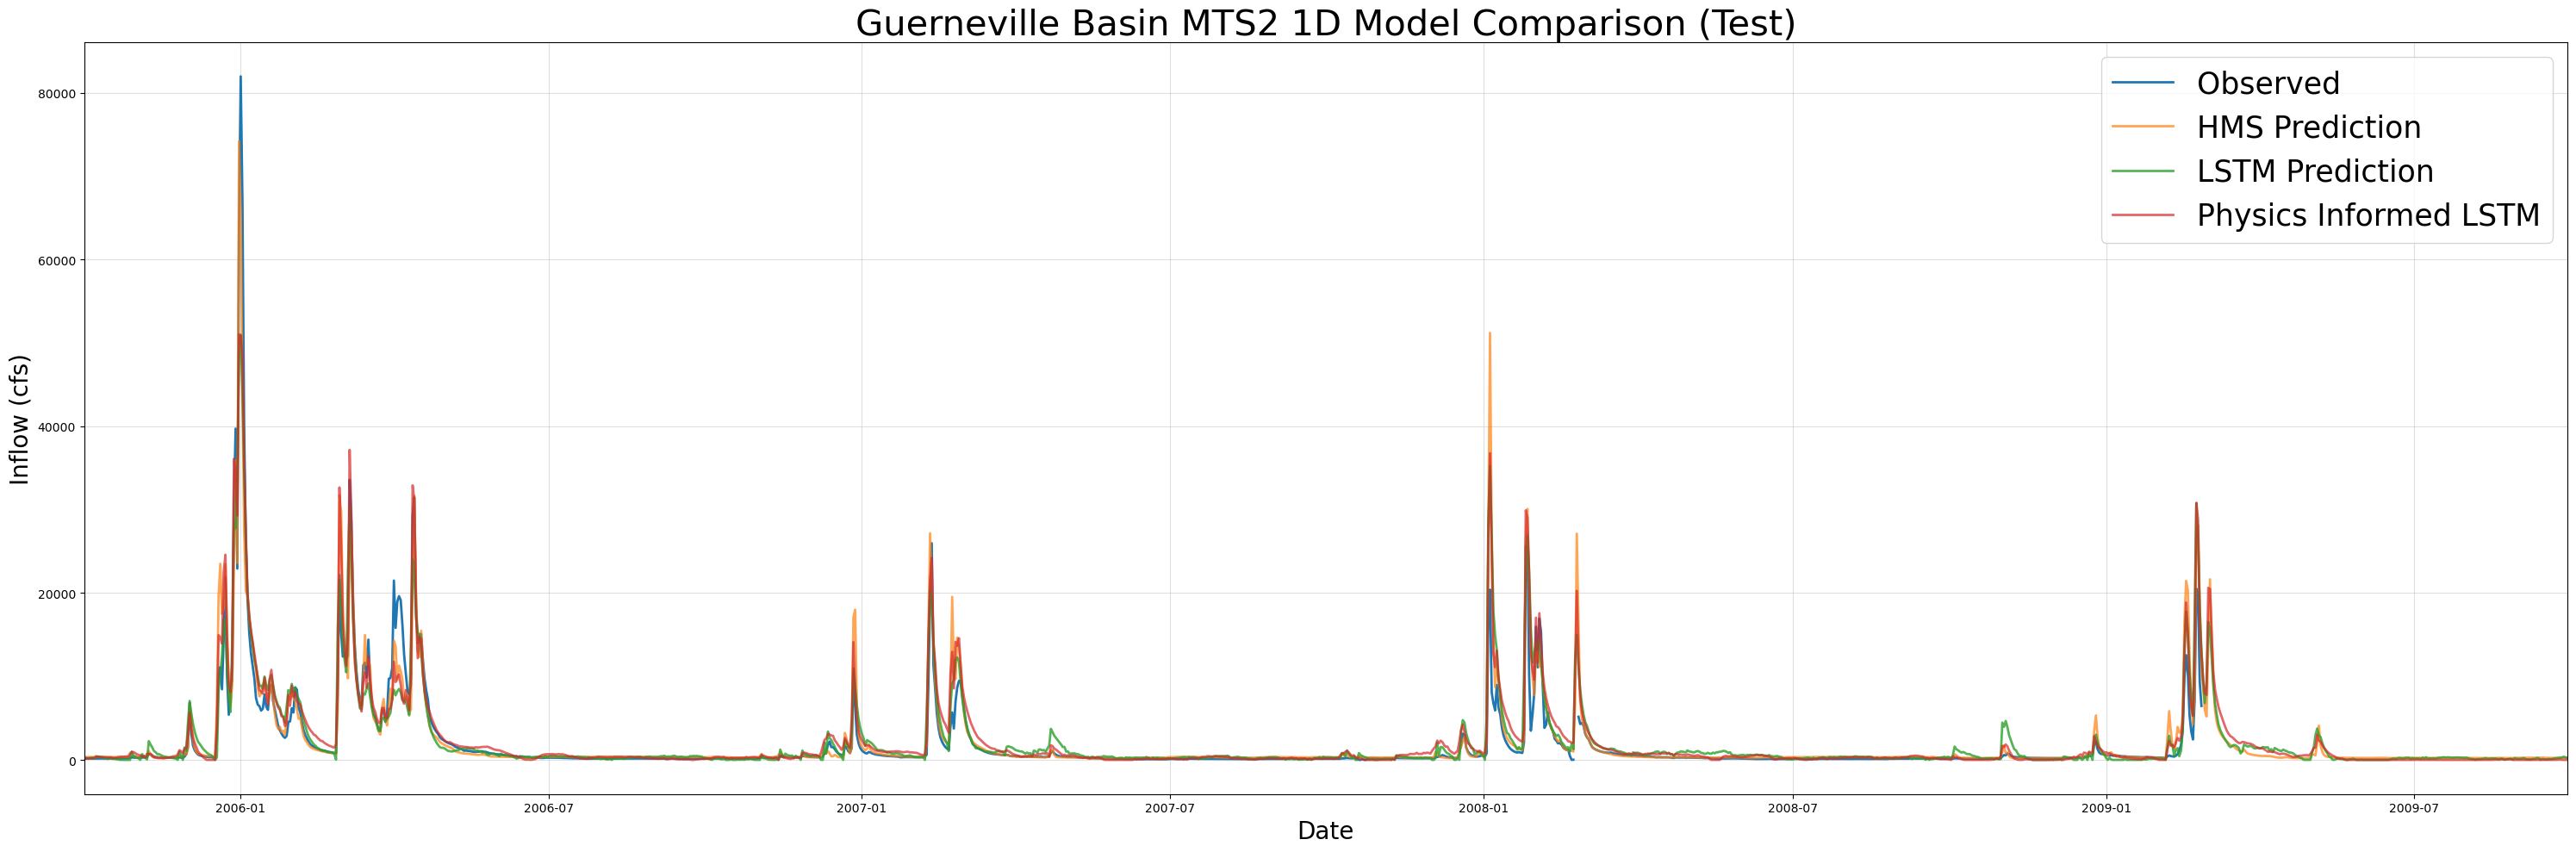

In [24]:
if not skip_best_model_train:
    print("\nPlotting combined MTS2 results (Test, 1D)...")
    combinedPlot(
        lstm_results=no_physics_test_csv_1D,
        lstmPhysics_results=physics_test_csv_1D,
        HMS_results=path_to_physics_data_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1D.csv",
        plot_filename="guerneville_mts2_test_1D_comparison.png",
        timeseries_filename="guerneville_mts2_test_1D_combined_ts.csv"
    )
else:
    combined_df_test_1D = pd.read_csv("guerneville_mts2_test_1D_combined_ts.csv")
    combinedPlotFromDf(
        combined_df_test_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1D.csv"
    )

In [25]:
if not skip_best_model_train:
    fancyCombinedPlot(
        lstm_results=no_physics_test_csv_1D,
        lstmPhysics_results=physics_test_csv_1D,
        HMS_results=path_to_physics_data_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1D.csv",
        timeseries_filename="guerneville_mts2_test_1D_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(
        combined_df_test_1D,
        title="Guerneville Basin MTS2 1D Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1D.csv"
    )

[INFO] Wrote metrics CSV: guerneville_mts2_test_metrics_1D.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso

[INFO] Wrote metrics CSV: guerneville_mts2_test_metrics_1H.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso

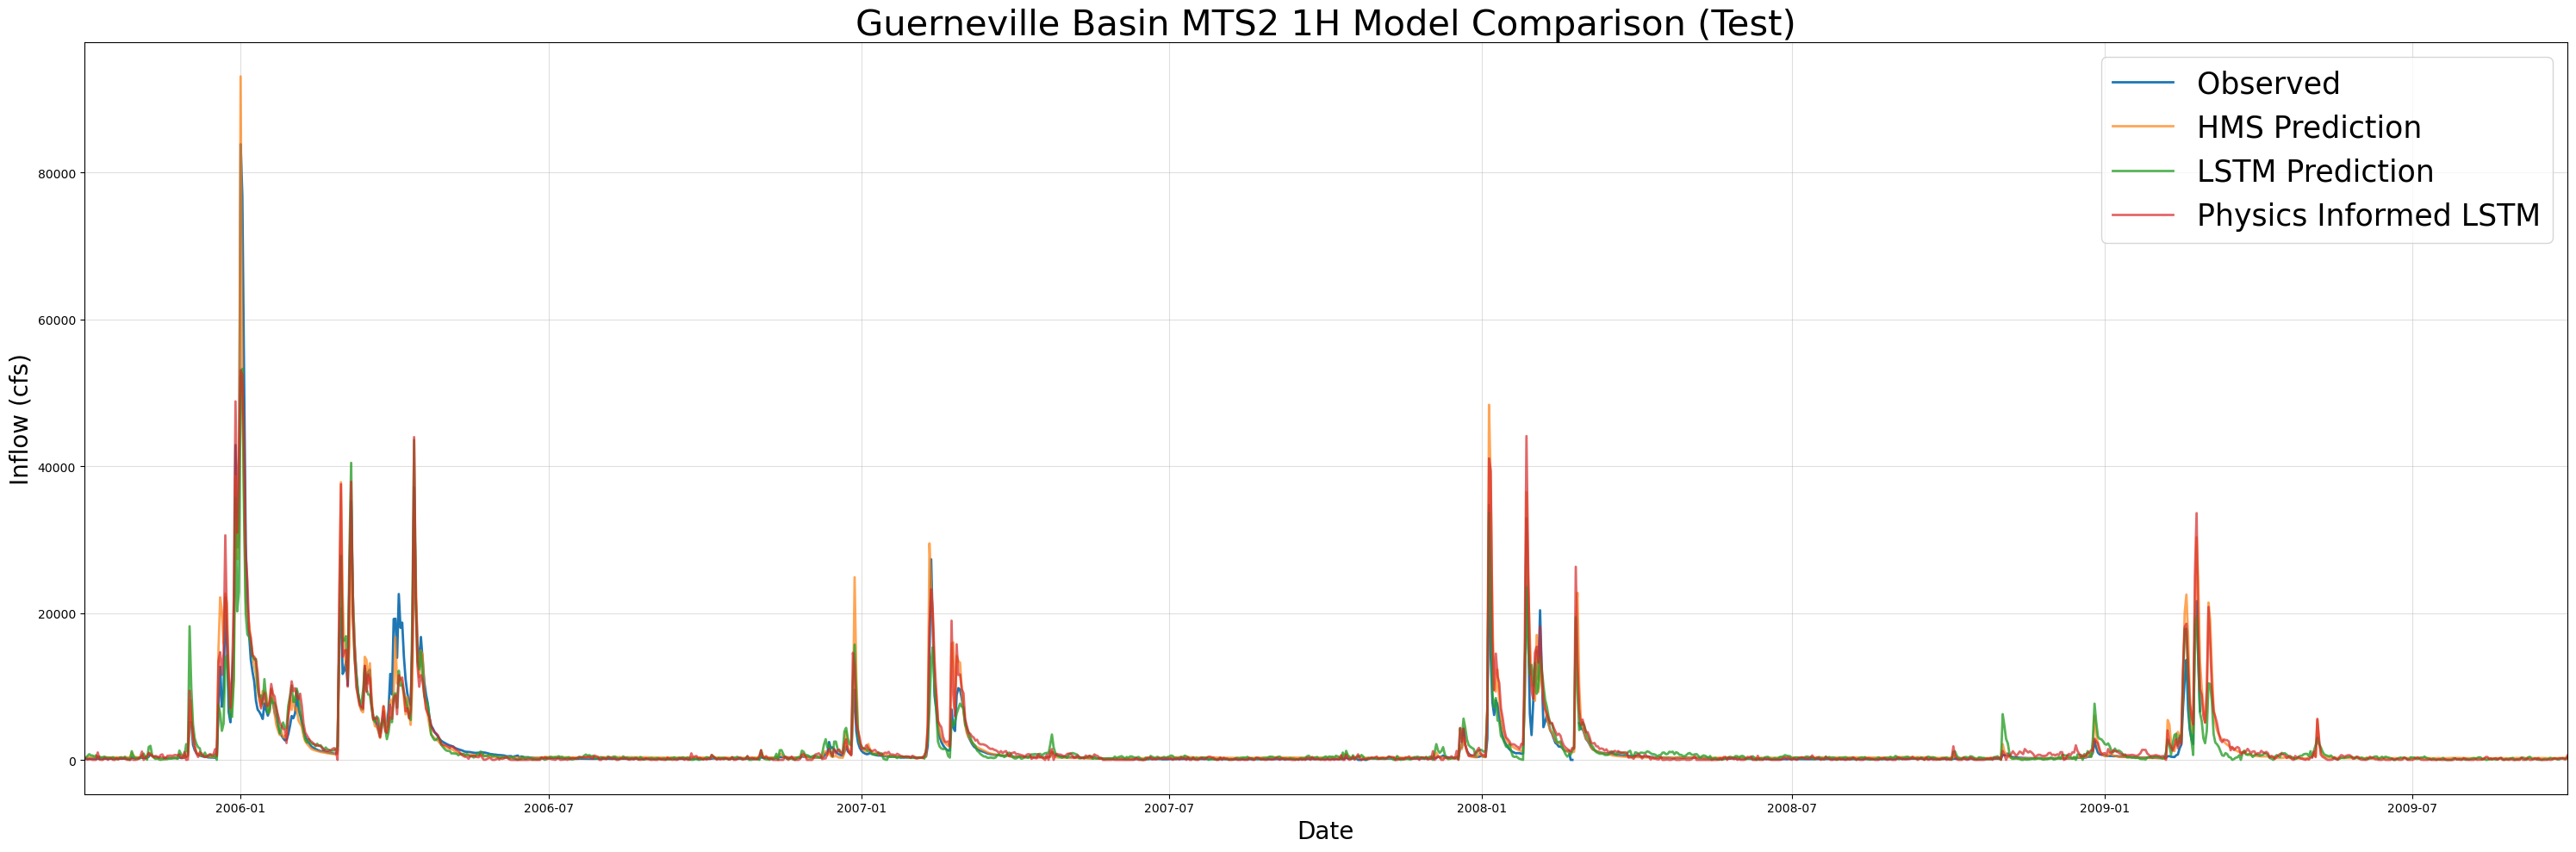

In [26]:
if not skip_best_model_train:
    print("\nPlotting combined MTS2 results (Test, 1H)...")
    combinedPlot(
        lstm_results=no_physics_test_csv_1H,
        lstmPhysics_results=physics_test_csv_1H,
        HMS_results=path_to_physics_data_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1H.csv",
        plot_filename="guerneville_mts2_test_1H_comparison.png",
        timeseries_filename="guerneville_mts2_test_1H_combined_ts.csv"
    )
else:
    combined_df_test_1H = pd.read_csv("guerneville_mts2_test_1H_combined_ts.csv")
    combinedPlotFromDf(
        combined_df_test_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1H.csv"
    )

In [27]:
if not skip_best_model_train:
    fancyCombinedPlot(
        lstm_results=no_physics_test_csv_1H,
        lstmPhysics_results=physics_test_csv_1H,
        HMS_results=path_to_physics_data_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1H.csv",
        timeseries_filename="guerneville_mts2_test_1H_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(
        combined_df_test_1H,
        title="Guerneville Basin MTS2 1H Model Comparison (Test)",
        fName="guerneville_mts2_test_metrics_1H.csv"
    )

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

/Users/canruso

[INFO] Wrote metrics CSV: guerneville_mts2_test_metrics_1H.csv


In [28]:
if skip_best_model_train:
    test_metrics = pd.read_csv("guerneville_mts2_test_metrics_1D.csv")
    print(test_metrics)

     Unnamed: 0           HMS          LSTM  Physics_Informed_LSTM
0           NSE  8.494332e-01  8.390286e-01           8.674644e-01
1           MSE  4.631773e+06  4.951841e+06           4.077090e+06
2          RMSE  2.152155e+03  2.225273e+03           2.019181e+03
3           KGE  8.413894e-01  8.009378e-01           7.545502e-01
4     Alpha-NSE  1.028050e+00  9.148115e-01           9.881512e-01
5      Beta-KGE  1.138674e+00  1.159991e+00           1.236799e+00
6      Beta-NSE  4.868050e-02  5.616352e-02           8.312642e-02
7     Pearson-r  9.283059e-01  9.177098e-01           9.365051e-01
8           FHV  2.461585e+00 -7.328234e+00           3.338921e+00
9           FMS -2.449251e+01 -2.339236e+00           1.342141e+01
10          FLV  9.657444e+01 -1.230571e+01          -7.919843e+00
11  Peak-Timing  8.000000e-01  6.000000e-01           4.000000e-01
12    Peak-MAPE  1.497819e+01  3.116160e+01           2.256175e+01


In [29]:
if skip_best_model_train:
    test_metrics = pd.read_csv("guerneville_mts2_test_metrics_1H.csv")
    print(test_metrics)

     Unnamed: 0           HMS          LSTM  Physics_Informed_LSTM
0           NSE  8.604469e-01  8.729040e-01           8.601809e-01
1           MSE  4.425601e+06  4.030552e+06           4.434038e+06
2          RMSE  2.103711e+03  2.007624e+03           2.105716e+03
3           KGE  8.484351e-01  8.258819e-01           8.303959e-01
4     Alpha-NSE  1.036407e+00  8.406647e-01           1.012843e+00
5      Beta-KGE  1.131652e+00  1.035792e+00           1.155054e+00
6      Beta-NSE  4.559173e-02  1.239490e-02           5.369630e-02
7     Pearson-r  9.343168e-01  9.395986e-01           9.324817e-01
8           FHV  3.751064e+00 -1.604901e+01           5.999772e+00
9           FMS -2.468427e+01  4.259797e-01           3.057854e+01
10          FLV  9.757196e+01  6.593978e+00           5.727281e+01
11  Peak-Timing  2.500000e-01  5.000000e-01           0.000000e+00
12    Peak-MAPE  2.225420e+01  2.387429e+01           2.873493e+01


In [1]:
# end time in UTC
end_time = datetime.utcnow()
print("End time:", end_time.strftime("%Y-%m-%d %H:%M:%S"))
print("total time:", end_time - start_time)

NameError: name 'datetime' is not defined